In [16]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv("./data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x=df.drop(columns=["math_score"],axis=1)
y=df["math_score"]

In [6]:
print("Categories in 'gender' variable is",end=" ")
print(df["gender"].unique())
print("Categories in 'race_ethnicity' variable is",end=" ")
print(df["race_ethnicity"].unique())
print("Categories in 'parental_level_of_education' variable is",end=" ")
print(df["parental_level_of_education"].unique())
print("Categories in 'lunch' variable is",end=" ")
print(df["lunch"].unique())
print("Categories in 'test_preparation_course' variable is",end=" ")
print(df["test_preparation_course"].unique())

Categories in 'gender' variable is ['female' 'male']
Categories in 'race_ethnicity' variable is ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable is ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable is ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable is ['none' 'completed']


In [9]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer=StandardScaler()
encode=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",encode,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)


In [10]:
x=preprocessor.fit_transform(x)

In [15]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [26]:
def evaluate_model(y_true, y_pred):
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    
    return mae, rmse, r2


In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the r

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2897
- Mean Absolute Error: 4.2363
- R2 Score: 0.8786
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5854
- Mean Absolute Error: 4.3975
- R2 Score: 0.8623


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6102
- Mean Absolute Error: 5.1990
- R2 Score: 0.8104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.7021
- Mean Absolute Error: 5.3566
- R2 Score: 0.8018


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2818
- Mean Absolute Error: 4.2268
- R2 Score: 0.8789
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5674
- Mean Absolute Error: 4.3880
- R2 Score: 0.8632


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8034
- Mean Absolute Error: 4.6020
- R2 Score: 0.8538
-----------------------

c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3114
- Mean Absolute Error: 1.8180
- R2 Score: 0.9768
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6629
- Mean Absolute Error: 4.6209
- R2 Score: 0.8585




c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.8897
- Mean Absolute Error: 0.6205
- R2 Score: 0.9966
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4130
- Mean Absolute Error: 5.0565
- R2 Score: 0.8185




c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 2.9675
- Mean Absolute Error: 2.3476
- R2 Score: 0.9618
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6766
- Mean Absolute Error: 4.5164
- R2 Score: 0.8578


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8210
- Mean Absolute Error: 4.7363
- R2 Score: 0.8529
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3151
- Mean Absolute Error: 5.1081
- R2 Score: 0.8240




c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\user\anaconda3\envs\pfa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.863213
0,Linear Regression,0.862327
5,Random Forest Regressor,0.857937
7,CatBoosting Regressor,0.857797
6,XGBRegressor,0.818506
8,AdaBoost Regressor,0.812844
1,Lasso,0.801773
3,K-Neighbors Regressor,0.790108
4,Decision Tree,0.740227


### Linear Regression

In [28]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of the model is %.2f" %score)

accuracy of the model is 86.23


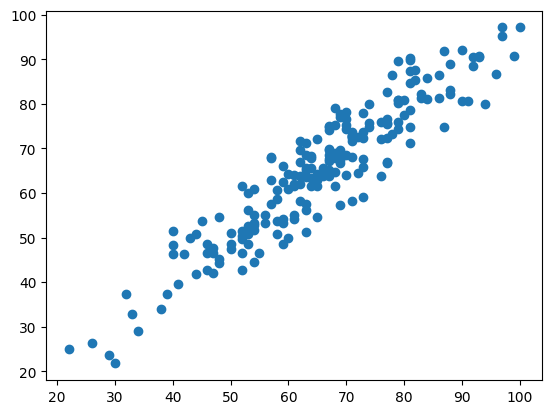

In [29]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math_score'>

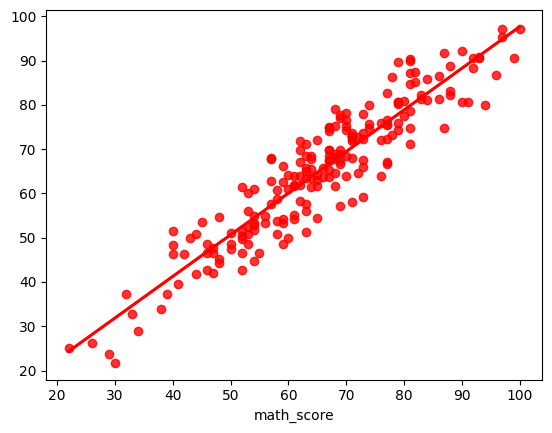

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
993,62,62.000,0.000
859,87,74.750,12.250
298,40,48.375,-8.375
553,77,66.625,10.375
672,69,69.750,-0.750
...,...,...,...
679,63,63.500,-0.500
722,74,75.750,-1.750
215,84,81.125,2.875
653,65,61.625,3.375
